In [188]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [189]:
import tensorflow as tf

In [190]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # 메모리 사용 제한을 위한 설정
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    # 특정 GPU만 사용하도록 설정
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
  except RuntimeError as e:
    # 프로그램 시작 후에는 GPU 설정을 변경할 수 없으므로
    # 런타임 오류 발생 시 예외 처리가 필요함
    print(e)

In [191]:
import pandas as pd

## 데이터 로딩

In [192]:
df=pd.read_csv("data/ChatbotData.csv")
df

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0
...,...,...,...
11818,훔쳐보는 것도 눈치 보임.,티가 나니까 눈치가 보이는 거죠!,2
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 거 티나나봐요.,2
11820,흑기사 해주는 짝남.,설렜겠어요.,2
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,잘 헤어질 수 있는 사이 여부인 거 같아요.,2


In [193]:
duplicates = df.duplicated(subset=["Q","A"])
duplicates.any()
count_duplicates = duplicates.sum()
count_duplicates
df2 = df[duplicates]
df2

,Q,A,label
5527,결혼이나 하지 왜 자꾸 나한테 화 내냐구!,힘들겠네요.,1
5537,고백하고 후회하면 어떡하지,후회는 후회를 낳을뿐이에요. 용기 내세요.,1
5542,공부는 내 체질이 아닌 것 같아,확신이 없나봐요.,1
5704,기숙사 괜찮을까,혼자 사는 것보다 불편하겠죠.,1
5774,나는 좋은데 ….,현실의 벽에 부딪혔나봐요.,1
...,...,...,...
8764,환승 가능?,환승은 30분 안에,1
8780,회사 사람들이 아직도 불편해,회사에는 동료가 있을 뿐이에요.,1
8782,회사에는 왜 친구 같은 사람이 없을까,회사는 친구 사귀는 곳이 아니에요.,1
8789,후련하달까,후련하니 다행이에요.,1


In [194]:
df= df.drop_duplicates(subset=["Q","A"])

In [195]:
import re

def preprocess_korean_sentence(sentence):
    # 한글, 영어, 숫자, 그리고 기본 문장부호를 제외한 모든 문자 제거
    sentence = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9?.!,]+", " ", sentence)

    # 중복되는 공백 제거
    sentence = re.sub(r'[" "]+', " ", sentence)

    # 문자열 앞뒤의 불필요한 공백 제거
    sentence = sentence.strip()
    return sentence

# 함수를 테스트하기 위한 코드
print(preprocess_korean_sentence("이것은 한국어 123 and English 처리 예시입니다! ㅋㅋ ^^"))


이것은 한국어 123 and English 처리 예시입니다! ㅋㅋ


In [196]:
df["Q_clean"] = df["Q"].apply(lambda x : preprocess_korean_sentence(x) )
df["A_clean"]= df["A"].apply(lambda x : preprocess_korean_sentence(x) )

/tmp/ipykernel_3548/1658250254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Q_clean"] = df["Q"].apply(lambda x : preprocess_korean_sentence(x) )
/tmp/ipykernel_3548/1658250254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["A_clean"]= df["A"].apply(lambda x : preprocess_korean_sentence(x) )


In [197]:
df[["Q_clean","Q"]]

,Q_clean,Q
0,12시 땡!,12시 땡!
1,1지망 학교 떨어졌어,1지망 학교 떨어졌어
2,3박4일 놀러가고 싶다,3박4일 놀러가고 싶다
3,3박4일 정도 놀러가고 싶다,3박4일 정도 놀러가고 싶다
4,PPL 심하네,PPL 심하네
...,...,...
11818,훔쳐보는 것도 눈치 보임.,훔쳐보는 것도 눈치 보임.
11819,훔쳐보는 것도 눈치 보임.,훔쳐보는 것도 눈치 보임.
11820,흑기사 해주는 짝남.,흑기사 해주는 짝남.
11821,힘든 연애 좋은 연애라는게 무슨 차이일까?,힘든 연애 좋은 연애라는게 무슨 차이일까?


In [198]:
df[["A_clean","A"]]

,A_clean,A
0,하루가 또 가네요.,하루가 또 가네요.
1,위로해 드립니다.,위로해 드립니다.
2,여행은 언제나 좋죠.,여행은 언제나 좋죠.
3,여행은 언제나 좋죠.,여행은 언제나 좋죠.
4,눈살이 찌푸려지죠.,눈살이 찌푸려지죠.
...,...,...
11818,티가 나니까 눈치가 보이는 거죠!,티가 나니까 눈치가 보이는 거죠!
11819,훔쳐보는 거 티나나봐요.,훔쳐보는 거 티나나봐요.
11820,설렜겠어요.,설렜겠어요.
11821,잘 헤어질 수 있는 사이 여부인 거 같아요.,잘 헤어질 수 있는 사이 여부인 거 같아요.


In [199]:
questions = df["Q"].values
answers = df["A"].values

In [200]:
print('전처리 후의 22번째 질문 샘플: {}'.format(questions[21]))
print('전처리 후의 22번째 답변 샘플: {}'.format(answers[21]))

전처리 후의 22번째 질문 샘플: 가스비 장난 아님
전처리 후의 22번째 답변 샘플: 다음 달에는 더 절약해봐요.


In [201]:
%pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.


In [202]:
import tensorflow_datasets as tfds
print("살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐")

# 질문과 답변 데이터셋에 대해서 Vocabulary 생성
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(questions + answers, target_vocab_size=2**13)
print("슝=3 ")

살짝 오래 걸릴 수 있어요. 스트레칭 한 번 해볼까요? 👐
슝=3 


In [203]:
# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
print("슝=3")

슝=3


In [204]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [8320]
END_TOKEN의 번호 : [8321]


In [205]:
# 시작 토큰과 종료 토큰을 고려하여 +2를 하여 단어장의 크기를 산정합니다.
VOCAB_SIZE = tokenizer.vocab_size + 2
print(VOCAB_SIZE)

8322


In [206]:
# 임의의 22번째 샘플에 대해서 정수 인코딩 작업을 수행.
# 각 토큰을 고유한 정수로 변환
print('정수 인코딩 후의 21번째 질문 샘플: {}'.format(tokenizer.encode(questions[21])))
print('정수 인코딩 후의 21번째 답변 샘플: {}'.format(tokenizer.encode(answers[21])))

정수 인코딩 후의 21번째 질문 샘플: [5822, 602, 2495, 4166]
정수 인코딩 후의 21번째 답변 샘플: [2686, 7632, 7, 6353, 91, 8110]


In [207]:
# 샘플의 최대 허용 길이 또는 패딩 후의 최종 길이
MAX_LENGTH = 40
print(MAX_LENGTH)

40


## 패딩 적용 , 토큰나이즈

In [208]:
# 정수 인코딩, 최대 길이를 초과하는 샘플 제거, 패딩
def tokenize_and_filter(inputs, outputs):
  tokenized_inputs, tokenized_outputs = [], []
  
  for (sentence1, sentence2) in zip(inputs, outputs):
    # 정수 인코딩 과정에서 시작 토큰과 종료 토큰을 추가
    sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
    sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN

    # 최대 길이 40 이하인 경우에만 데이터셋으로 허용
    if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
      tokenized_inputs.append(sentence1)
      tokenized_outputs.append(sentence2)
  
  # 최대 길이 40으로 모든 데이터셋을 패딩
  tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
  tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
  
  return tokenized_inputs, tokenized_outputs
print("슝=3")

슝=3


In [209]:
questions, answers = tokenize_and_filter(questions, answers)
print('단어장의 크기 :',(VOCAB_SIZE))
print('필터링 후의 질문 샘플 개수: {}'.format(len(questions)))
print('필터링 후의 답변 샘플 개수: {}'.format(len(answers)))

단어장의 크기 : 8322
필터링 후의 질문 샘플 개수: 11750
필터링 후의 답변 샘플 개수: 11750


In [210]:
answers.shape

(11750, 40)

In [211]:
BATCH_SIZE = 64
BUFFER_SIZE = 20000

# 디코더는 이전의 target을 다음의 input으로 사용합니다.
# 이에 따라 outputs에서는 START_TOKEN을 제거하겠습니다.
dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))

# dataset = dataset.cache()
# dataset = dataset.shuffle(BUFFER_SIZE)
# dataset = dataset.batch(BATCH_SIZE)
# dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)
# print("슝=3")

## 훈련, 테스트 분리

In [212]:
import tensorflow as tf

# 데이터셋 크기 정의
DATASET_SIZE = len(questions)  # questions 배열의 길이를 사용하여 데이터셋 크기를 정의합니다.

# 훈련과 테스트 세트로 나누기 위한 인덱스 계산
TRAIN_SIZE = int(0.8 * DATASET_SIZE)  # 예를 들어, 데이터셋의 80%를 훈련용으로 사용
TEST_SIZE = DATASET_SIZE - TRAIN_SIZE  # 나머지 20%를 테스트용으로 사용

# 데이터셋을 섞고 훈련 및 테스트 세트로 분리
dataset = dataset.shuffle(BUFFER_SIZE)
train_dataset = dataset.take(TRAIN_SIZE)  # 첫 80% 데이터를 훈련용으로 사용
test_dataset = dataset.skip(TRAIN_SIZE)   # 나머지 20% 데이터를 테스트용으로 사용

# 훈련 및 테스트 데이터셋 배치 처리
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.experimental.AUTOTUNE)

print("데이터셋 분리 완료!")


데이터셋 분리 완료!


In [213]:
def transformer(vocab_size,
                num_layers,
                units,
                d_model,
                num_heads,
                dropout,
                name="transformer"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")
  dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")

  # 인코더에서 패딩을 위한 마스크
  enc_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='enc_padding_mask')(inputs)

  # 디코더에서 미래의 토큰을 마스크 하기 위해서 사용합니다.
  # 내부적으로 패딩 마스크도 포함되어져 있습니다.
  look_ahead_mask = tf.keras.layers.Lambda(
      create_look_ahead_mask,
      output_shape=(1, None, None),
      name='look_ahead_mask')(dec_inputs)

  # 두 번째 어텐션 블록에서 인코더의 벡터들을 마스킹
  # 디코더에서 패딩을 위한 마스크
  dec_padding_mask = tf.keras.layers.Lambda(
      create_padding_mask, output_shape=(1, 1, None),
      name='dec_padding_mask')(inputs)

  # 인코더
  enc_outputs = encoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[inputs, enc_padding_mask])

  # 디코더
  dec_outputs = decoder(
      vocab_size=vocab_size,
      num_layers=num_layers,
      units=units,
      d_model=d_model,
      num_heads=num_heads,
      dropout=dropout,
  )(inputs=[dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])

  # 완전연결층
  outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)

  return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)
print("슝=3")

슝=3


In [214]:
def create_padding_mask(x):
  mask = tf.cast(tf.math.equal(x, 0), tf.float32)
  # (batch_size, 1, 1, sequence length)
  return mask[:, tf.newaxis, tf.newaxis, :]
print("슝=3")

슝=3


In [215]:
def create_look_ahead_mask(x):
  seq_len = tf.shape(x)[1]
  look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
  padding_mask = create_padding_mask(x)
  return tf.maximum(look_ahead_mask, padding_mask)
print("슝=3")

슝=3


In [216]:
# 인코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 두 개의 서브 레이어가 존재합니다.
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention = MultiHeadAttention(
      d_model, num_heads, name="attention")({
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': padding_mask
      })

  # 어텐션의 결과는 Dropout과 Layer Normalization이라는 훈련을 돕는 테크닉을 수행
  attention = tf.keras.layers.Dropout(rate=dropout)(attention)
  attention = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(inputs + attention)

  # 두 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention + outputs)

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


In [217]:
def encoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name="encoder"):
  inputs = tf.keras.Input(shape=(None,), name="inputs")

  # 패딩 마스크 사용
  padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")

  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  # num_layers만큼 쌓아올린 인코더의 층.
  for i in range(num_layers):
    outputs = encoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name="encoder_layer_{}".format(i),
    )([outputs, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, padding_mask], outputs=outputs, name=name)
print("슝=3")

슝=3


In [218]:
# 디코더 하나의 레이어를 함수로 구현.
# 이 하나의 레이어 안에는 세 개의 서브 레이어가 존재합니다.
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
  inputs = tf.keras.Input(shape=(None, d_model), name="inputs")
  enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name="look_ahead_mask")
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')

  # 첫 번째 서브 레이어 : 멀티 헤드 어텐션 수행 (셀프 어텐션)
  attention1 = MultiHeadAttention(
      d_model, num_heads, name="attention_1")(inputs={
          'query': inputs,
          'key': inputs,
          'value': inputs,
          'mask': look_ahead_mask
      })

  # 멀티 헤드 어텐션의 결과는 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention1 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention1 + inputs)

  # 두 번째 서브 레이어 : 마스크드 멀티 헤드 어텐션 수행 (인코더-디코더 어텐션)
  attention2 = MultiHeadAttention(
      d_model, num_heads, name="attention_2")(inputs={
          'query': attention1,
          'key': enc_outputs,
          'value': enc_outputs,
          'mask': padding_mask
      })

  # 마스크드 멀티 헤드 어텐션의 결과는
  # Dropout과 LayerNormalization이라는 훈련을 돕는 테크닉을 수행
  attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)
  attention2 = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(attention2 + attention1)

  # 세 번째 서브 레이어 : 2개의 완전연결층
  outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)
  outputs = tf.keras.layers.Dense(units=d_model)(outputs)

  # 완전연결층의 결과는 Dropout과 LayerNormalization 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)
  outputs = tf.keras.layers.LayerNormalization(
      epsilon=1e-6)(outputs + attention2)

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


In [219]:
def decoder(vocab_size,
            num_layers,
            units,
            d_model,
            num_heads,
            dropout,
            name='decoder'):
  inputs = tf.keras.Input(shape=(None,), name='inputs')
  enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')
  look_ahead_mask = tf.keras.Input(
      shape=(1, None, None), name='look_ahead_mask')

  # 패딩 마스크
  padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')
  
  # 임베딩 레이어
  embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)
  embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))

  # 포지셔널 인코딩
  embeddings = PositionalEncoding(vocab_size, d_model)(embeddings)

  # Dropout이라는 훈련을 돕는 테크닉을 수행
  outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)

  for i in range(num_layers):
    outputs = decoder_layer(
        units=units,
        d_model=d_model,
        num_heads=num_heads,
        dropout=dropout,
        name='decoder_layer_{}'.format(i),
    )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])

  return tf.keras.Model(
      inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask],
      outputs=outputs,
      name=name)
print("슝=3")

슝=3


In [220]:
# 포지셔널 인코딩 레이어
class PositionalEncoding(tf.keras.layers.Layer):

  def __init__(self, position, d_model):
    super(PositionalEncoding, self).__init__()
    self.pos_encoding = self.positional_encoding(position, d_model)

  def get_angles(self, position, i, d_model):
    angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
    return position * angles

  def positional_encoding(self, position, d_model):
    # 각도 배열 생성
    angle_rads = self.get_angles(
        position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
        i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
        d_model=d_model)

    # 배열의 짝수 인덱스에는 sin 함수 적용
    sines = tf.math.sin(angle_rads[:, 0::2])
    # 배열의 홀수 인덱스에는 cosine 함수 적용
    cosines = tf.math.cos(angle_rads[:, 1::2])

    # sin과 cosine이 교차되도록 재배열
    pos_encoding = tf.stack([sines, cosines], axis=0)
    pos_encoding = tf.transpose(pos_encoding,[1, 2, 0]) 
    pos_encoding = tf.reshape(pos_encoding, [position, d_model])

    pos_encoding = pos_encoding[tf.newaxis, ...]
    return tf.cast(pos_encoding, tf.float32)

  def call(self, inputs):
    return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

print("슝=3")

슝=3


In [221]:
# 스케일드 닷 프로덕트 어텐션 함수
def scaled_dot_product_attention(query, key, value, mask):
  # 어텐션 가중치는 Q와 K의 닷 프로덕트
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # 가중치를 정규화
  depth = tf.cast(tf.shape(key)[-1], tf.float32)
  logits = matmul_qk / tf.math.sqrt(depth)

  # 패딩에 마스크 추가
  if mask is not None:
    logits += (mask * -1e9)

  # softmax적용
  attention_weights = tf.nn.softmax(logits, axis=-1)

  # 최종 어텐션은 가중치와 V의 닷 프로덕트
  output = tf.matmul(attention_weights, value)
  return output

print("슝=3")

슝=3


## 모델 설계

In [222]:
class MultiHeadAttention(tf.keras.layers.Layer):

  def __init__(self, d_model, num_heads, name="multi_head_attention"):
    super(MultiHeadAttention, self).__init__(name=name)
    self.num_heads = num_heads
    self.d_model = d_model

    assert d_model % self.num_heads == 0

    self.depth = d_model // self.num_heads

    self.query_dense = tf.keras.layers.Dense(units=d_model)
    self.key_dense = tf.keras.layers.Dense(units=d_model)
    self.value_dense = tf.keras.layers.Dense(units=d_model)

    self.dense = tf.keras.layers.Dense(units=d_model)

  def split_heads(self, inputs, batch_size):
    inputs = tf.reshape(
        inputs, shape=(batch_size, -1, self.num_heads, self.depth))
    return tf.transpose(inputs, perm=[0, 2, 1, 3])

  def call(self, inputs):
    query, key, value, mask = inputs['query'], inputs['key'], inputs[
        'value'], inputs['mask']
    batch_size = tf.shape(query)[0]

    # Q, K, V에 각각 Dense를 적용합니다
    query = self.query_dense(query)
    key = self.key_dense(key)
    value = self.value_dense(value)
    # 병렬 연산을 위한 머리를 여러 개 만듭니다
    query = self.split_heads(query, batch_size)
    key = self.split_heads(key, batch_size)
    value = self.split_heads(value, batch_size)


    # 스케일드 닷 프로덕트 어텐션 함수
    scaled_attention = scaled_dot_product_attention(query, key, value, mask)

    scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

    # 어텐션 연산 후에 각 결과를 다시 연결(concatenate)합니다
    concat_attention = tf.reshape(scaled_attention,
                                  (batch_size, -1, self.d_model))

    # 최종 결과에도 Dense를 한 번 더 적용합니다
    outputs = self.dense(concat_attention)

    return outputs
print("슝=3")

슝=3


In [223]:
tf.keras.backend.clear_session()

# 하이퍼파라미터
NUM_LAYERS = 2 # 인코더와 디코더의 층의 개수
D_MODEL = 256 # 인코더와 디코더 내부의 입, 출력의 고정 차원
NUM_HEADS = 8 # 멀티 헤드 어텐션에서의 헤드 수 
UNITS = 512 # 피드 포워드 신경망의 은닉층의 크기
DROPOUT = 0.1 # 드롭아웃의 비율

model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT)

model.summary()

Model: "transformer"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 inputs (InputLayer)         [(None, None)]               0         []                            
                                                                                                  
 dec_inputs (InputLayer)     [(None, None)]               0         []                            
                                                                                                  
 enc_padding_mask (Lambda)   (None, 1, 1, None)           0         ['inputs[0][0]']              
                                                                                                  
 encoder (Functional)        (None, None, 256)            3184640   ['inputs[0][0]',              
                                                                     'enc_padding_mask[0

In [224]:
def loss_function(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  
  loss = tf.keras.losses.SparseCategoricalCrossentropy(
      from_logits=True, reduction='none')(y_true, y_pred)

  mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)
  loss = tf.multiply(loss, mask)

  return tf.reduce_mean(loss)
print("슝=3")

슝=3


In [225]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, tf.float32)  # step 변수를 float32로 캐스팅
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps**-1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

# 예제 사용
learning_rate = CustomSchedule(D_MODEL)
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)


In [226]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Train Step')

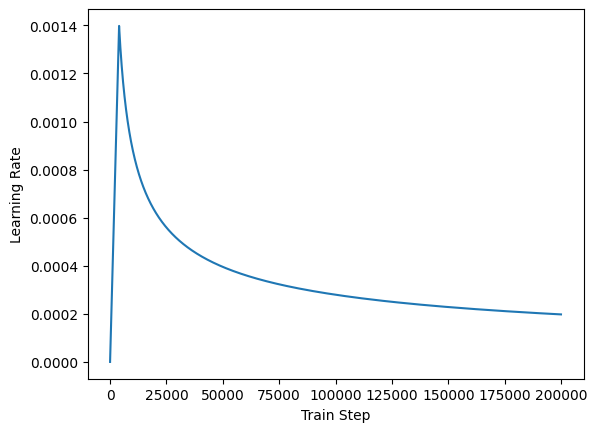

In [227]:
sample_learning_rate = CustomSchedule(d_model=128)

plt.plot(sample_learning_rate(tf.range(200000, dtype=tf.float32)))
plt.ylabel("Learning Rate")
plt.xlabel("Train Step")

In [228]:
learning_rate = CustomSchedule(D_MODEL)

optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

def accuracy(y_true, y_pred):
  y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))
  return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

model.compile(optimizer=optimizer, loss=loss_function, metrics=[accuracy])
print("슝=3")

슝=3


In [229]:
import os

In [230]:
# 체크포인트를 저장할 경로 설정
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# ModelCheckpoint 콜백 생성
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


## 학습

In [231]:
EPOCHS = 50
# 체크포인트 파일 경로
checkpoint_path = "training_1/cp.ckpt"

checkpoint_dir = "training_1"  # 체크포인트가 저장된 디렉토리 경로를 지정합니다.

checkpoint_file = os.path.join(checkpoint_dir, "checkpoint")

# 'checkpoint' 파일이 존재하면, 가중치를 로드합니다.
if os.path.exists(checkpoint_file):
    print("체크포인트 파일 발견. 가중치 로드 중...")
    latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
    model.load_weights(latest_checkpoint)
else:
    print("체크포인트 파일 없음. 새로운 가중치로 시작합니다.")

history = model.fit(train_dataset, 
                    epochs=EPOCHS, 
                    callbacks=[cp_callback],  # 콜백 추가
                    verbose=1)

체크포인트 파일 없음. 새로운 가중치로 시작합니다.
Epoch 1/50
147/147 [==============================] - ETA: 0s - loss: 1.5017 - accuracy: 0.0235
Epoch 1: saving model to training_1/cp.ckpt
147/147 [==============================] - 20s 82ms/step - loss: 1.5017 - accuracy: 0.0235
Epoch 2/50
147/147 [==============================] - ETA: 0s - loss: 1.2839 - accuracy: 0.0486
Epoch 2: saving model to training_1/cp.ckpt
147/147 [==============================] - 8s 55ms/step - loss: 1.2839 - accuracy: 0.0486
Epoch 3/50
147/147 [==============================] - ETA: 0s - loss: 1.0832 - accuracy: 0.0497
Epoch 3: saving model to training_1/cp.ckpt
147/147 [==============================] - 8s 52ms/step - loss: 1.0832 - accuracy: 0.0497
Epoch 4/50
147/147 [==============================] - ETA: 0s - loss: 0.9842 - accuracy: 0.0514
Epoch 4: saving model to training_1/cp.ckpt
147/147 [==============================] - 8s 52ms/step - loss: 0.9842 - accuracy: 0.0514
Epoch 5/50
147/147 [==============================

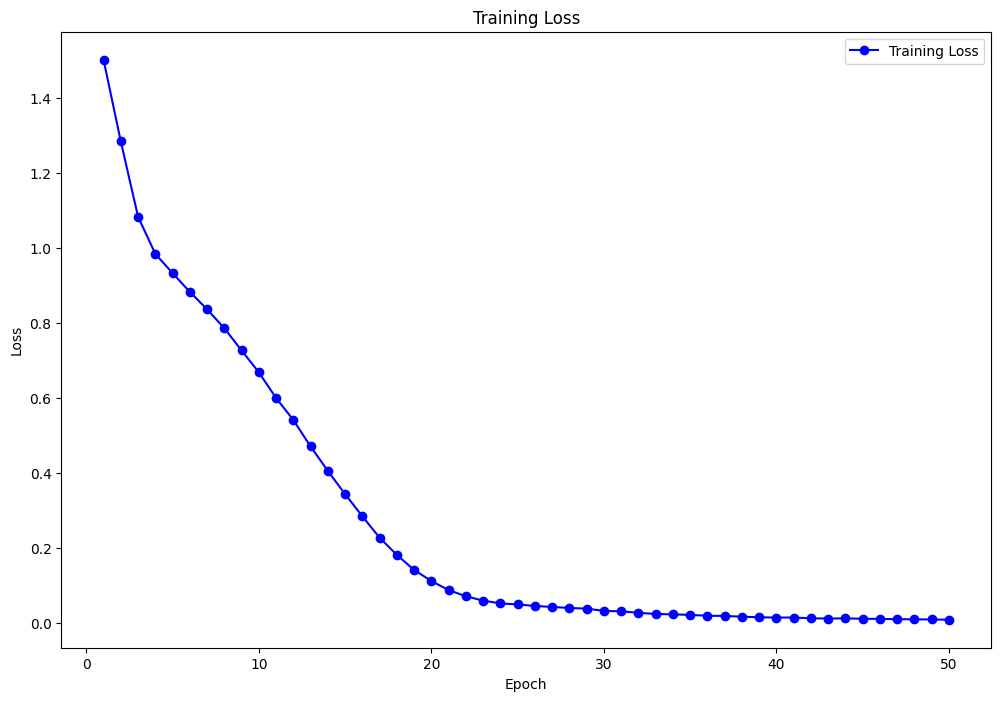

In [232]:
train_loss = history.history['loss']

# 에포크 번호 설정
epochs = range(1, EPOCHS + 1)

# 로스 그래프 그리기
plt.figure(figsize=(12, 8))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [233]:
def decoder_inference(sentence):
  sentence = preprocess_korean_sentence(sentence)

  # 입력된 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰을 앞뒤로 추가.
  # ex) Where have you been? → [[8331   86   30    5 1059    7 8332]]
  sentence = tf.expand_dims(
      START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)

  # 디코더의 현재까지의 예측한 출력 시퀀스가 지속적으로 저장되는 변수.
  # 처음에는 예측한 내용이 없음으로 시작 토큰만 별도 저장. ex) 8331
  output_sequence = tf.expand_dims(START_TOKEN, 0)

  # 디코더의 인퍼런스 단계
  for i in range(MAX_LENGTH):
    # 디코더는 최대 MAX_LENGTH의 길이만큼 다음 단어 예측을 반복합니다.
    predictions = model(inputs=[sentence, output_sequence], training=False)
    predictions = predictions[:, -1:, :]

    # 현재 예측한 단어의 정수
    predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

    # 만약 현재 예측한 단어가 종료 토큰이라면 for문을 종료
    if tf.equal(predicted_id, END_TOKEN[0]):
      break

    # 예측한 단어들은 지속적으로 output_sequence에 추가됩니다.
    # 이 output_sequence는 다시 디코더의 입력이 됩니다.
    output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)

  return tf.squeeze(output_sequence, axis=0)
print("슝=3")

슝=3


In [234]:
def sentence_generation(sentence):
  # 입력 문장에 대해서 디코더를 동작 시켜 예측된 정수 시퀀스를 리턴받습니다.
  prediction = decoder_inference(sentence)

  # 정수 시퀀스를 다시 텍스트 시퀀스로 변환합니다.
  predicted_sentence = tokenizer.decode(
      [i for i in prediction if i < tokenizer.vocab_size])

  print('입력 : {}'.format(sentence))
  print('출력 : {}'.format(predicted_sentence))

  return predicted_sentence
print("슝=3")

슝=3


In [235]:
sentence_generation('이거 참 어렵다.')

입력 : 이거 참 어렵다.
출력 : 사랑은 알다가도 모르겠어요.


'사랑은 알다가도 모르겠어요.'

In [236]:
for i in range(10):
    print(df["Q"][i])
    print(df["A"][i])
    print(sentence_generation(df["Q"][i]))
    print("-----------------------------------------")
    

12시 땡!
하루가 또 가네요.
입력 : 12시 땡!
출력 : 하루가 또 가네요.
하루가 또 가네요.
-----------------------------------------
1지망 학교 떨어졌어
위로해 드립니다.
입력 : 1지망 학교 떨어졌어
출력 : 위로해 드립니다.
위로해 드립니다.
-----------------------------------------
3박4일 놀러가고 싶다
여행은 언제나 좋죠.
입력 : 3박4일 놀러가고 싶다
출력 : 여행은 언제나 좋죠.
여행은 언제나 좋죠.
-----------------------------------------
3박4일 정도 놀러가고 싶다
여행은 언제나 좋죠.
입력 : 3박4일 정도 놀러가고 싶다
출력 : 여행은 언제나 좋죠.
여행은 언제나 좋죠.
-----------------------------------------
PPL 심하네
눈살이 찌푸려지죠.
입력 : PPL 심하네
출력 : 눈살이 찌푸려지죠.
눈살이 찌푸려지죠.
-----------------------------------------
SD카드 망가졌어
다시 새로 사는 게 마음 편해요.
입력 : SD카드 망가졌어
출력 : 다시 새로 사는 게 마음 편해요.
다시 새로 사는 게 마음 편해요.
-----------------------------------------
SD카드 안돼
다시 새로 사는 게 마음 편해요.
입력 : SD카드 안돼
출력 : 다시 새로 사는 게 마음 편해요.
다시 새로 사는 게 마음 편해요.
-----------------------------------------
SNS 맞팔 왜 안하지ㅠㅠ
잘 모르고 있을 수도 있어요.
입력 : SNS 맞팔 왜 안하지ㅠㅠ
출력 : 잘 모르고 있을 수도 있어요.
잘 모르고 있을 수도 있어요.
-----------------------------------------
SNS 시간낭비인 거 아는데 매일 하는 중
시간을 정하고 해보세요.
입력 : SNS 시간낭비인 거 아는데 매일 하는 중
출력 : 시

In [237]:
import numpy


In [243]:
# 테스트 데이터셋의 배치 중 하나를 선택
for batch in test_dataset.take(1):
    input_dict, output_dict = batch

    # input_dict와 output_dict에서 텐서 추출
    example_input = input_dict['inputs'].numpy()[0]
    example_output = output_dict['outputs'].numpy()[0]

    # 역토크나이즈 실행
    decoded_input = tokenizer.decode([i for i in example_input if i < tokenizer.vocab_size])
    decoded_output = tokenizer.decode([i for i in example_output if i < tokenizer.vocab_size])

    print("원래의 입력 문장:", decoded_input)
    print("원래의 출력 문장:", decoded_output)
    print("예측 문장:", sentence_generation(decoded_input))
    


원래의 입력 문장: 나 쫌 불쌍한 거 같아
원래의 출력 문장: 저도 사는데요.
입력 : 나 쫌 불쌍한 거 같아
출력 : 저도 사는데요.
예측 문장: 저도 사는데요.


In [252]:
checkpoint_dir = "training_1"  # 체크포인트가 저장된 디렉토리 경로를 지정합니다.
checkpoint_file = os.path.join(checkpoint_dir, "checkpoint")

# 'checkpoint' 파일이 존재하면, 가중치를 로드합니다.
if os.path.exists(checkpoint_file):
    print("체크포인트 파일 발견. 가중치 로드 중...")
    latest_checkpoint = tf.train.latest_checkpoint(checkpoint_dir)
    model.load_weights(latest_checkpoint)
else:
    print("체크포인트 파일 없음. 새로운 가중치로 시작합니다.")

체크포인트 파일 발견. 가중치 로드 중...


In [248]:
for layer in model.layers:
    weights = layer.get_weights()
    print(weights)

[]
[]
[]
[array([[-1.5667427e-02,  3.5661571e-03, -1.6725205e-02, ...,
        -1.5629876e-02,  4.1216519e-02, -9.5213875e-03],
       [-3.7239254e-03,  8.3918907e-02,  6.7951687e-02, ...,
         3.6765293e-03, -3.4287442e-02,  2.8256049e-02],
       [-3.2874260e-02, -2.1239154e-02, -7.2475314e-02, ...,
        -3.4086511e-02,  1.4475474e-01, -8.5635092e-03],
       ...,
       [-9.7143650e-04,  4.8001740e-02, -1.4344603e-04, ...,
         1.5363682e-02,  2.1578718e-02, -2.4188519e-02],
       [-1.2122120e-01, -2.3499023e-02, -5.8940861e-02, ...,
        -1.5356445e-01,  1.1030451e-01, -9.7022038e-03],
       [-6.7257337e-02,  1.0065040e-02, -5.0754608e-03, ...,
        -1.0450142e-01,  1.1270766e-01, -2.4699125e-02]], dtype=float32), array([[-0.1437983 , -0.04888031,  0.00881565, ...,  0.02868857,
        -0.02593321, -0.04183498],
       [-0.09382529,  0.04258205, -0.03497154, ..., -0.11685731,
        -0.04481134, -0.12555471],
       [ 0.04707414,  0.11916357, -0.10807759, ...,  

In [249]:
val_loss, val_acc = model.evaluate(test_dataset)

37/37 [==============================] - 2s 26ms/step - loss: 0.0045 - accuracy: 0.1773


In [253]:
print(f"Validation loss: {val_loss}, Validation accuracy: {val_acc}")

Validation loss: 0.00451011722907424, Validation accuracy: 0.17725041508674622


In [254]:
EPOCHS = 50
history = model.fit(train_dataset, 
                    epochs=EPOCHS, 
                    callbacks=[cp_callback],  # 콜백 추가
                    verbose=1)

Epoch 1/50
147/147 [==============================] - ETA: 0s - loss: 0.0088 - accuracy: 0.1737
Epoch 1: saving model to training_1/cp.ckpt
147/147 [==============================] - 7s 48ms/step - loss: 0.0088 - accuracy: 0.1737
Epoch 2/50
146/147 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.1740
Epoch 2: saving model to training_1/cp.ckpt
147/147 [==============================] - 7s 47ms/step - loss: 0.0078 - accuracy: 0.1740
Epoch 3/50
146/147 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.1732
Epoch 3: saving model to training_1/cp.ckpt
147/147 [==============================] - 7s 50ms/step - loss: 0.0085 - accuracy: 0.1732
Epoch 4/50
147/147 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.1739
Epoch 4: saving model to training_1/cp.ckpt
147/147 [==============================] - 7s 49ms/step - loss: 0.0079 - accuracy: 0.1739
Epoch 5/50
146/147 [============================>.] - ETA: 0s - loss: 0.0066 - a

큰 차이 없는듯

## 회고

이번 프로젝트에서는 트랜스포머를 이용하여, 입력값에 대해 사용자를 위로해주는 답변을 해주는 채팅봇을 만들어 보는 시간이었습니다. 

다만 아쉬운 점은 에폭을 크게 올려도 올라가지 않는 액큐러시와 그에비해 너무 정답과 똑같은 대답들만을 출력하여 오버피팅을 문제가 있는 것으로 보이며, 완전히 새로 입력된 값에 대해서는 전혀 엉뚱한 대답을 한다는 한계점이 존재하였습니다. 

하지만 정해진 질문 리스트 안에서는 올바른 대답을 출력하기에 이를 통해 충분한 가능성을 보았고, 차차 새로운 기능들을 실험적으로 적용해가며, 성능향상을 위해 노력해봐야 할것같습니다.
